# Business Case: Yulu - Hypothesis Testing

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends.

Objective:

- To find which variables are significant in predicting the demand for shared electric cycles in the Indian market?
- To understand how well those variables describe the electric cycle demands

Concept Used:

- Bi-Variate Analysis
- 2-sample t-test
- ANNOVA
- Chi-square

## Importing data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import ttest_ind # numeric vs categorical
from scipy.stats import f_oneway # ANOVA numerical vs categorical
from scipy.stats import kruskal # when ANOVA assumptions fail Numerical vs categorical
from scipy.stats import chi2_contingency # categorical vs categorical
from scipy.stats import shapiro,kstest # to check assumptions of normality of data
from scipy.stats import levene # to check equal variance in each group
from scipy.stats import ttest_rel # paired t test

In [3]:
df=pd.read_csv('yulu.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [6]:
df.shape

(10886, 12)

In [7]:
df.isna().sum()
# No missing value

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

# Exploratory Data Analysis

### Univariate -

In [8]:
# Drop unnecessary columns
df.drop('datetime',axis=1, inplace=True )

In [9]:
# defining categorical columns
columns=['season','holiday','workingday','weather']
df[columns] = df[columns].astype('object')

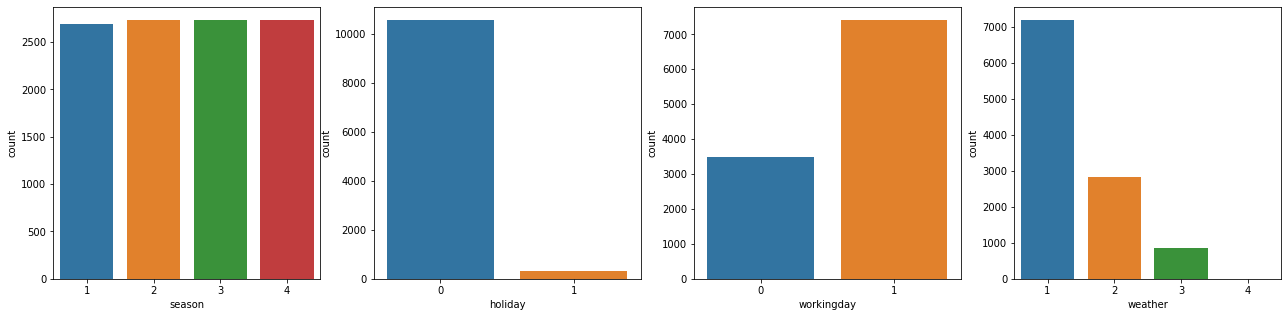

In [10]:
plt.figure(figsize = [22,5])
for i in range (len(columns)):
  plt.subplot(1, 4, i+1)
  sns.countplot(data=df, x=columns[i])

- Equal number of days in each season.
- More working days than holidays.
- Weather is mostly Clear, Few clouds, partly cloudy.

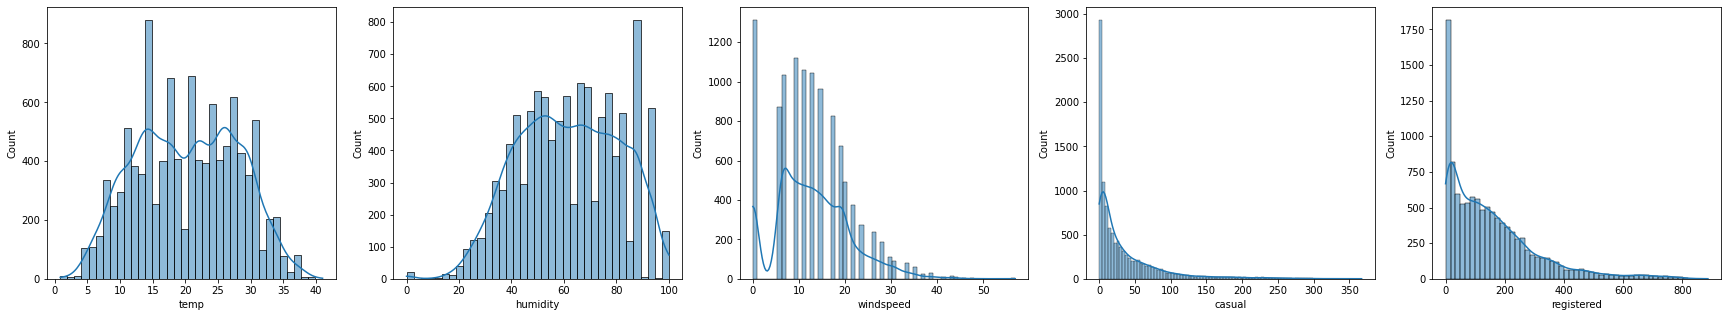

In [11]:
plt.figure(figsize = [30,5])
num_cols = ['temp', 'humidity', 'windspeed','casual','registered']
for i in range (len(num_cols)):
  plt.subplot(1, 5, i+1)
  sns.histplot(data=df, x=num_cols[i], kde=True)

- People prefer to rent cycle when temperature range 13-27 Celsius.
- For humdity less than 20, count of rent is very very low.
-  Rent count is more when windspeed is less than 20.
- Casual customers rent very less.

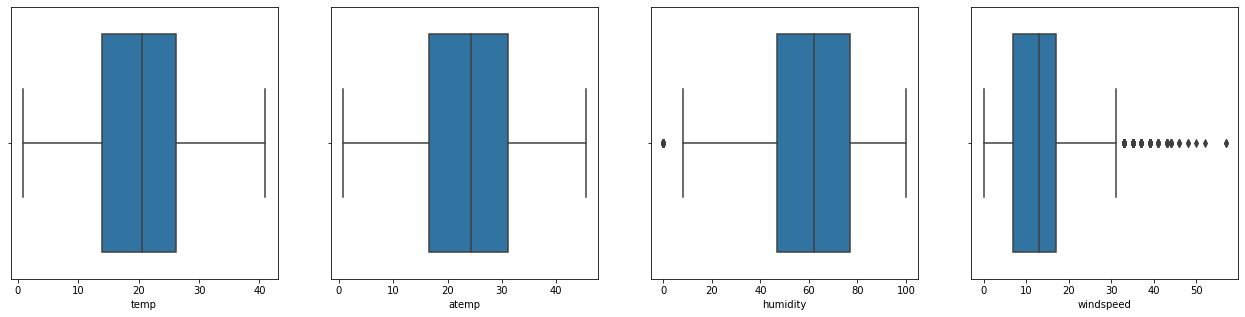

In [12]:
plt.figure(figsize = [22,5])
num_cols = ['temp', 'atemp', 'humidity', 'windspeed']
for i in range (len(num_cols)):
  plt.subplot(1, 4, i+1)
  sns.boxplot(data=df, x=num_cols[i])

### Bivariate-

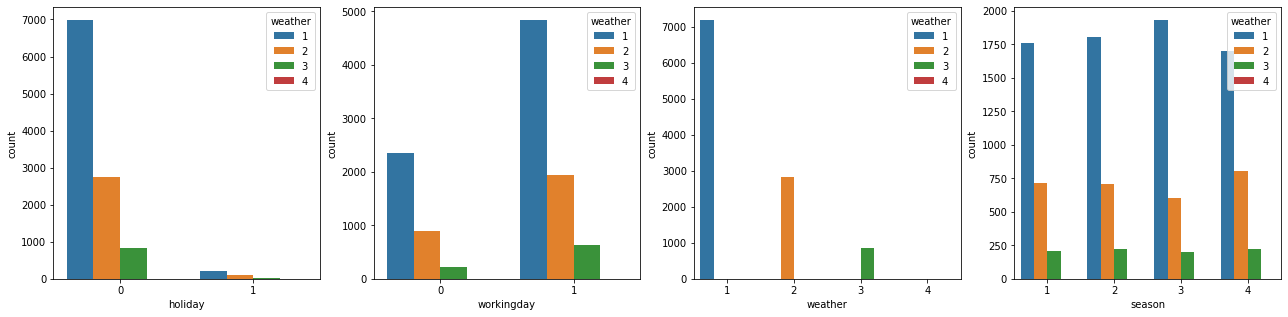

In [13]:
plt.figure(figsize = [22,5])
cat_cols = ['holiday','workingday','weather','season']
for i in range (len(cat_cols)):
  plt.subplot(1, 4, i+1)
  sns.countplot(data=df, x=cat_cols[i],hue=cat_cols[2])

- Weather 1 & 2 (with little or no rain) are favourable for cycle rent.

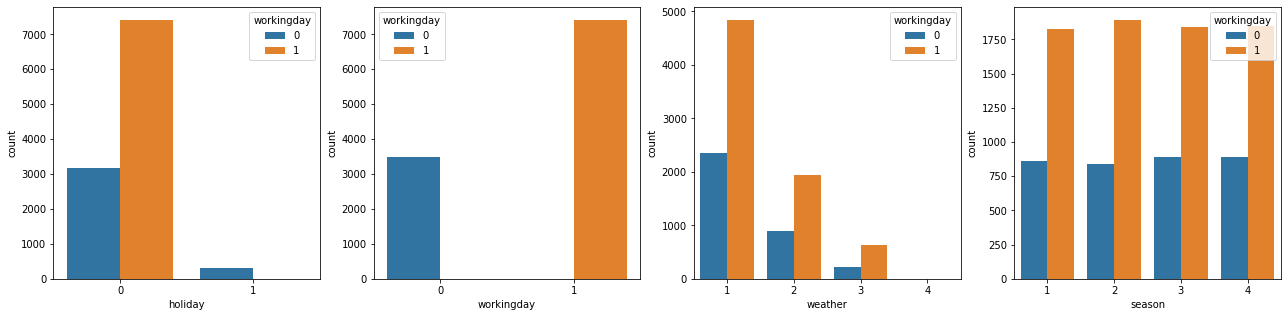

In [14]:
plt.figure(figsize = [22,5])
cat_cols = ['holiday','workingday','weather','season']
for i in range (len(cat_cols)):
  plt.subplot(1, 4, i+1)
  sns.countplot(data=df, x=cat_cols[i],hue=cat_cols[1])

Working day having more demand. As employees must be using it to travel to their offices.

In [15]:
df.corr()['count']

temp          0.394454
atemp         0.389784
humidity     -0.317371
windspeed     0.101369
casual        0.690414
registered    0.970948
count         1.000000
Name: count, dtype: float64

- Positive correlation with temperature.

- Negative correaltion with humidity.

# Hypothesis Testing (30 Points):
> 2- Sample T-Test to check if Working Day has an effect on the number of electric cycles rented 

> ANNOVA to check if No. of cycles rented is similar or different in different 1. weather 2. season 

> Chi-square test to check if Weather is dependent on the season

## 2- Sample T-Test to check if Working Day has an effect on the number of electric cycles rented

Ho: Working day has no effect on electric cycles rented

Ha: Working day impacts electric cycles rented

Alpha: 0.05

We use two sample t-test as only two categories involved

In [16]:
df['workingday'].unique()

array([0, 1], dtype=object)

In [17]:
#Ho: Working day has no effect on electric cycles rented

#Ha: Working day impacts electric cycles rented

workingday=df[df['workingday']==1]['count'].values
non_workingday=df[df['workingday']==0]['count'].values

print("Avg number of cycles rented on workingday",np.mean(workingday))
print("Avg number of cycles rented on non working day",np.mean(non_workingday))

test_stat,p_value=ttest_ind(workingday,non_workingday)
print("p value :",p_value)
if p_value<0.05:
  print("Reject HO ")  
else:
  print("Fail to reject HO")

Avg number of cycles rented on workingday 193.01187263896384
Avg number of cycles rented on non working day 188.50662061024755
p value : 0.22644804226361348
Fail to reject HO


Since p value is greater than alpha, We **fail to reject null hypothesis**. This means that **working day has no significant effect on number of cycles rented**.

### 2- ANNOVA to check if No. of cycles rented is similar or different in different -

1. weather

2. season



- 1. Lets analyse weather impact first -

Ho: Weather has no effect on electric cycles rented

Ha: Weather impacts electric cycles rented

Alpha: 0.05

Its intuitive to use ANOVA as the number of weather category is more than 2 , but lets see if the assumptions of data normality are satisfied-

In [18]:
df['weather'].unique()

array([1, 2, 3, 4], dtype=object)

In [19]:
clear=df[df['weather']==1]['count'].values
misty=df[df['weather']==2]['count'].values
snowy=df[df['weather']==3]['count'].values
rainy=df[df['weather']==4]['count'].values


<ipython-input-20-3e1dea2a1529>:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(rainy)


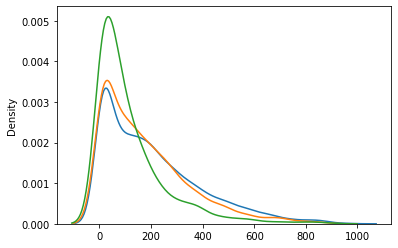

In [20]:
sns.kdeplot(clear)
sns.kdeplot(misty)
sns.kdeplot(snowy)
sns.kdeplot(rainy)
plt.show()

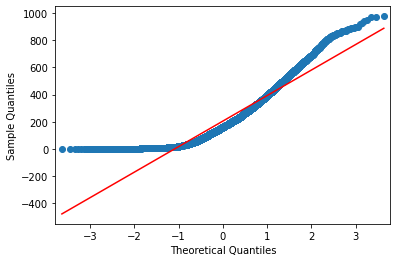

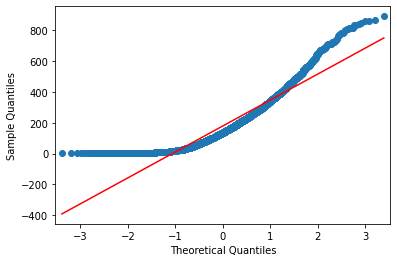

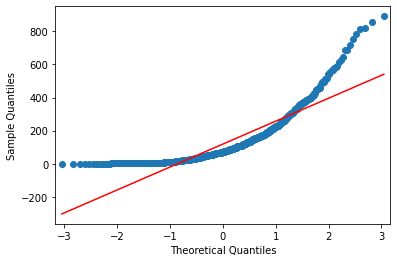

In [21]:
import statsmodels.api as sm
sm.qqplot(clear,line='s')
sm.qqplot(misty,line='s')
sm.qqplot(snowy,line='s')
plt.show()

In [22]:
# SHAPIRO TEST FOR NORMALITY-

# H0: Data is gaussian
# Ha: Data is not gaussian

test_stat,p_value=shapiro(df[df['weather']==1]['count'].sample(100))
print(p_value)
if p_value<0.05:
  print("Reject HO, Data is not gaussian")
else:
  print("Fail to reject HO, Data is gaussian")

6.261653879846563e-07
Reject HO, Data is not gaussian


In [23]:
# KS TEST FOR NORMALITY-

# H0: Data is gaussian
# Ha: Data is not gaussian

subset=df[df['weather']==1]['count'].sample(100)

mu= subset.mean()
sigma= subset.std()

test_stat, p_value = kstest(
    subset,
    norm.cdf,
    args=(mu,sigma)
    )
print(p_value)
if p_value<0.05:
  print("Reject HO, Data is not gaussian")
else:
  print("Fail to reject HO, Data is gaussian")

0.0030449195987478058
Reject HO, Data is not gaussian


From QQ Plots, KS Test, Shapiro test it is clear that the data is not normal.

Let us check for equal variance in each group- Levens test

<Axes: xlabel='count', ylabel='Count'>

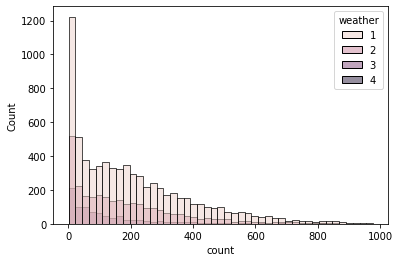

In [24]:
sns.histplot(data=df,x=df['count'], hue='weather')

In [25]:
# LEVENE TEST TO CHECK EQUAL VARIANCE

# H0: All weathers have same variance (high p-value)
# Ha: Different variance (low p value)

test_stat,p_value=levene(clear,misty)
print(p_value)
if p_value<0.05:
  print("Reject HO implies variance is different")
else:
  print("Fail to reject HO")

3.49541909725777e-10
Reject HO implies variance is different


From QQ Plots, KS Test, Shapiro test it is clear that the data is not normal.

From Levenes test , it is clear that the assumptions of equal variance also dont hold true.

So the assumptions of ANOVA are not met.


**kruskal test** should be applied but since the question asks to implement ANOVA we will implement both the test -

 

In [26]:
# KRUSKAL WALLIS TEST-

#Ho: Weather has no effect on electric cycles rented

#Ha: Weather impacts electric cycles rented

f_stat,p_val=kruskal(clear,misty,snowy,rainy)
print(p_val)
if p_val<0.05:
  print("Reject HO ")  
else:
  print("Fail to reject HO")

3.501611300708679e-44
Reject HO 


In [27]:
# ANOVA TEST-

#Ho: Weather has no effect on electric cycles rented

#Ha: Weather impacts electric cycles rented

f_stat,p_val=f_oneway(clear,misty,snowy,rainy)
print(p_val)
if p_val<0.05:
  print("Reject HO ")  
else:
  print("Fail to reject HO")

5.482069475935669e-42
Reject HO 


Since p value is less than alpha, We **reject null hypothesis**. 

This means that **weather has statistically significant effect on number of cycles rented**.

- 2. Now lets analyse the impact of seasons on electric cycle rented- 

In [28]:
df['season'].unique()

array([1, 2, 3, 4], dtype=object)

In [29]:
spring=df[df['season']==1]['count'].values
summer=df[df['season']==2]['count'].values
fall=df[df['season']==3]['count'].values
winter=df[df['season']==4]['count'].values

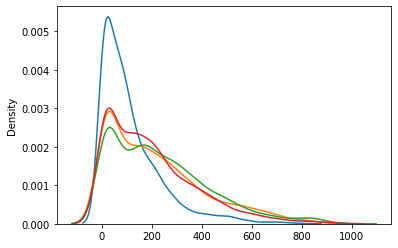

In [30]:
sns.kdeplot(spring)
sns.kdeplot(summer)
sns.kdeplot(fall)
sns.kdeplot(winter)
plt.show()

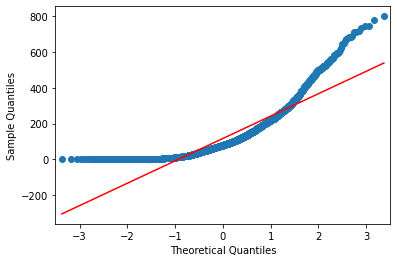

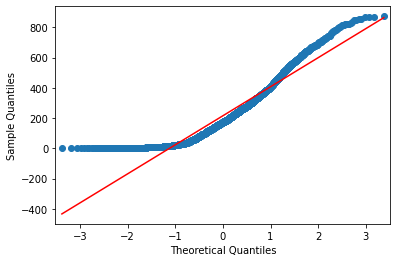

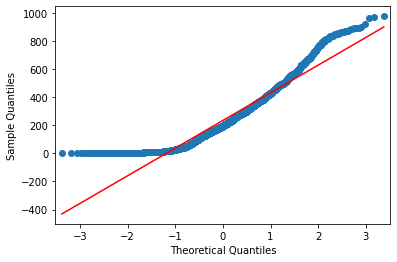

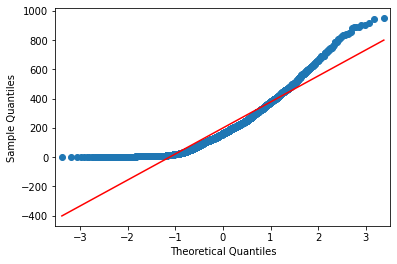

In [31]:
import statsmodels.api as sm
sm.qqplot(spring,line='s')
sm.qqplot(summer,line='s')
sm.qqplot(fall,line='s')
sm.qqplot(winter,line='s')
plt.show()

The data is not normal , kruskal test should be applied but since the question asks to implement ANOVA we will implement both the test -

In [32]:
# KRUSKAL TEST - 

#Ho: season has no effect on electric cycles rented

#Ha: season impacts electric cycles rented


f_stat,p_val=kruskal(spring,summer,fall,winter)
print(p_val)
if p_val<0.05:
  print("Reject HO ")  
else:
  print("Fail to reject HO")

2.479008372608633e-151
Reject HO 


In [33]:
# ANOVA TEST - 

#Ho: season has no effect on electric cycles rented

#Ha: season impacts electric cycles rented


f_stat,p_val=f_oneway(spring,summer,fall,winter)
print(p_val)
if p_val<0.05:
  print("Reject HO ")  
else:
  print("Fail to reject HO")

6.164843386499654e-149
Reject HO 


Since p value is less than alpha, We  **reject null hypothesis**. This means that **season has significant effect on number of cycles rented**.





### Chi-square test to check if Weather is dependent on the season -

Null Hypothesis (H0) :- Weather is independent of Season.

Alternate Hypothesis (H1) :- Weather is dependent of Season.

Significance Level (Alpha) :- 0.05

Test :- Chi-Square Test  (between two categorical variables)
 


In [34]:
weather_season = pd.crosstab(df['season'], df['weather'])
weather_season

weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


In [35]:
test_stat, p_value, df, exp_values=chi2_contingency(weather_season)
# print(test_stat)
print(p_value)
# print(df)

if p_value < 0.05:
  print("reject HO")
else:
  print("fail to reject HO")

1.549925073686492e-07
reject HO


Since p < alpha, we **reject Null hypothesis**, this implies that **weather and season are definitely related**.

# Insights -

- Data looks common as - equal number of days in each season, More working days than holidays, Weather is mostly Clear, Few clouds, partly cloudy.
- More number of bikes rented when weather is clear with less clouds

- Positive correlation with temperature, People prefer to rent cycle when temperature range 13-27 Celsius.

- Negative correlation with humidity, For humdity less than 20, count of rent is very very low.

-  Rent count is more when windspeed is less than 20.

- A 2 sample t-test reveals that there is not sufficient evidence to prove any significant impact of working and non working days on the bike rented.

- ANOVA test confirm that the impact of weather and seasons on the number of bikes rented is statitically significant.


- A Chi-2 test on categorcial variables result in statisitcally significant relation between weather and seasons.

# Recommendations -

- Since casual users are very less, the company should focus on marketing strategy to bring more customers. eg. first time user discounts etc

- On non working days Yulu can offer promotional deals on activities like city exploration, some health campaigns etc

- In heavy rains as rent count is very low , the company can introduce a bike having shade or protection from  rain.